In [46]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import pickle
import cloudpickle
from comparers import ModelComparer
from util import calc_ground_truth_constraints, constraint_matrix_to_rules
from tasks.boston_housing import make_task3, make_task4
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
clf_a, clf_b, X, y, feature_names, categorical_features, feature_precisions = make_task3('.')
comparer_ab = ModelComparer(clf_a, clf_b, feature_names)

Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


In [3]:
clf_a, clf_c, _, _, _, _, _ = make_task4('.')
comparer_ac = ModelComparer(clf_a, clf_c, feature_names, name_b='C')

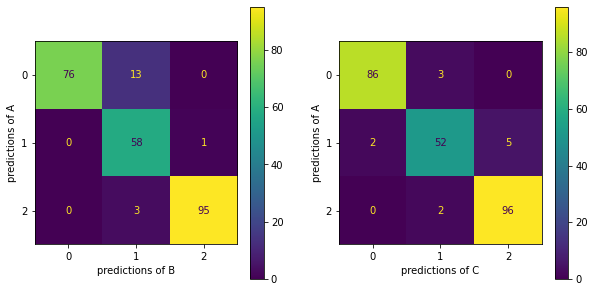

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
comparer_ab.plot_confusion_matrix(X, ax=axs[0])
comparer_ac.plot_confusion_matrix(X, ax=axs[1])
plt.savefig('figures/boston-cf.pdf')

In [13]:
X = pd.DataFrame(X, columns=feature_names)

In [ ]:
pd.Series().round()

In [36]:
for comparer in [comparer_ab, comparer_ac]:
    print(comparer.name_a + ' vs. ' + comparer.name_b)
    X2 = X.copy()
    X2.insert(0, 'Label', comparer.class_names[comparer.predict_mclass_diff(X)])
    X2 = X2[np.in1d(X2['Label'], comparer.difference_class_names)]
    X2 = X2.reset_index().sort_values(['Label', 'index']).set_index('index')
    X2 = X2.set_index('Label', append=True)
    for feature, precision in zip(feature_names, feature_precisions):
        if precision == 0:
            X2[feature] = X2[feature].astype(int)
        else:
            X2[feature] = X2[feature].round(precision)
    display(X2)
    print(X2.to_latex())

A vs. B


,,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
index,Label,,,,,,,,,,,
8,"(0, 1)",3.8,0,18.10,0.77,6.25,2,2.30,24.0,666,20.2,14.19
28,"(0, 1)",2.2,0,19.58,0.60,5.85,2,2.42,5.0,403,14.7,11.64
40,"(0, 1)",2.3,0,19.58,0.60,6.32,2,2.10,5.0,403,14.7,11.10
42,"(0, 1)",1.1,0,8.14,0.54,5.70,2,3.82,4.0,307,21.0,18.26
74,"(0, 1)",0.6,0,21.89,0.62,5.73,2,2.07,4.0,437,21.2,17.25
151,"(0, 1)",0.9,0,8.14,0.54,6.02,2,4.44,4.0,307,21.0,17.07
152,"(0, 1)",2.3,0,19.58,0.60,5.88,2,2.39,5.0,403,14.7,12.03
157,"(0, 1)",1.0,0,21.89,0.62,5.76,2,2.35,4.0,437,21.2,17.31
180,"(0, 1)",0.3,0,21.89,0.62,5.69,2,1.79,4.0,437,21.2,17.19


\begin{tabular}{llrrrrrrrrrrr}
\toprule
    &        &  CRIM &  ZN &  INDUS &   NOX &    RM &  AGE &   DIS &   RAD &  TAX &  PTRATIO &  LSTAT \\
index & Label &       &     &        &       &       &      &       &       &      &          &        \\
\midrule
8   & (0, 1) &   3.8 &   0 &  18.10 &  0.77 &  6.25 &    2 &  2.30 &  24.0 &  666 &     20.2 &  14.19 \\
28  & (0, 1) &   2.2 &   0 &  19.58 &  0.60 &  5.85 &    2 &  2.42 &   5.0 &  403 &     14.7 &  11.64 \\
40  & (0, 1) &   2.3 &   0 &  19.58 &  0.60 &  6.32 &    2 &  2.10 &   5.0 &  403 &     14.7 &  11.10 \\
42  & (0, 1) &   1.1 &   0 &   8.14 &  0.54 &  5.70 &    2 &  3.82 &   4.0 &  307 &     21.0 &  18.26 \\
74  & (0, 1) &   0.6 &   0 &  21.89 &  0.62 &  5.73 &    2 &  2.07 &   4.0 &  437 &     21.2 &  17.25 \\
151 & (0, 1) &   0.9 &   0 &   8.14 &  0.54 &  6.02 &    2 &  4.44 &   4.0 &  307 &     21.0 &  17.07 \\
152 & (0, 1) &   2.3 &   0 &  19.58 &  0.60 &  5.88 &    2 &  2.39 &   5.0 &  403 &     14.7 &  12.03 \\
157 &

,,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
index,Label,,,,,,,,,,,
8,"(0, 1)",3.8,0,18.10,0.77,6.25,2,2.30,24.0,666,20.2,14.19
40,"(0, 1)",2.3,0,19.58,0.60,6.32,2,2.10,5.0,403,14.7,11.10
238,"(0, 1)",0.0,0,13.89,0.55,5.89,1,3.11,5.0,276,16.4,13.51
23,"(1, 0)",0.8,0,8.14,0.54,5.60,2,4.45,4.0,307,21.0,16.51
156,"(1, 0)",0.8,0,8.14,0.54,5.65,2,4.45,4.0,307,21.0,16.48
22,"(1, 2)",0.1,60,1.69,0.41,6.58,0,10.71,4.0,411,18.3,5.49
55,"(1, 2)",0.5,20,3.97,0.65,7.23,1,2.12,5.0,264,13.0,9.52
68,"(1, 2)",0.0,90,2.97,0.40,7.09,0,7.31,1.0,285,15.3,7.85
122,"(1, 2)",0.0,85,4.15,0.43,6.52,0,8.54,4.0,351,17.9,6.36


\begin{tabular}{llrrrrrrrrrrr}
\toprule
    &        &  CRIM &  ZN &  INDUS &   NOX &    RM &  AGE &    DIS &   RAD &  TAX &  PTRATIO &  LSTAT \\
index & Label &       &     &        &       &       &      &        &       &      &          &        \\
\midrule
8   & (0, 1) &   3.8 &   0 &  18.10 &  0.77 &  6.25 &    2 &   2.30 &  24.0 &  666 &     20.2 &  14.19 \\
40  & (0, 1) &   2.3 &   0 &  19.58 &  0.60 &  6.32 &    2 &   2.10 &   5.0 &  403 &     14.7 &  11.10 \\
238 & (0, 1) &   0.0 &   0 &  13.89 &  0.55 &  5.89 &    1 &   3.11 &   5.0 &  276 &     16.4 &  13.51 \\
23  & (1, 0) &   0.8 &   0 &   8.14 &  0.54 &  5.60 &    2 &   4.45 &   4.0 &  307 &     21.0 &  16.51 \\
156 & (1, 0) &   0.8 &   0 &   8.14 &  0.54 &  5.65 &    2 &   4.45 &   4.0 &  307 &     21.0 &  16.48 \\
22  & (1, 2) &   0.1 &  60 &   1.69 &  0.41 &  6.58 &    0 &  10.71 &   4.0 &  411 &     18.3 &   5.49 \\
55  & (1, 2) &   0.5 &  20 &   3.97 &  0.65 &  7.23 &    1 &   2.12 &   5.0 &  264 &     13.0 &   9.52

In [77]:
feature_importances_per_clf = {}
order = None
for clf in ['A', 'B', 'C']:
    with open(f'explanations/featimp-{clf.lower()}.pickle', 'rb') as f:
        feature_importances = pickle.load(f)
    if order is None:
        order = np.argsort(-feature_importances)
    feature_importances_per_clf[clf] = pd.Series(feature_importances[order],
                                                 index=pd.Index(feature_names[order], name='Feature'))

In [78]:
feature_importances = pd.concat(feature_importances_per_clf, names=['Classifier'])
feature_importances = pd.DataFrame(feature_importances, columns=['Importance']).reset_index()
feature_importances

,Classifier,Feature,Importance
0,A,LSTAT,0.995866
1,A,ZN,0.220373
2,A,INDUS,0.199342
3,A,CRIM,0.129655
4,A,RAD,0.119568
5,A,TAX,0.114244
6,A,RM,0.111313
7,A,AGE,0.093538
8,A,DIS,0.089799
9,A,PTRATIO,0.069686


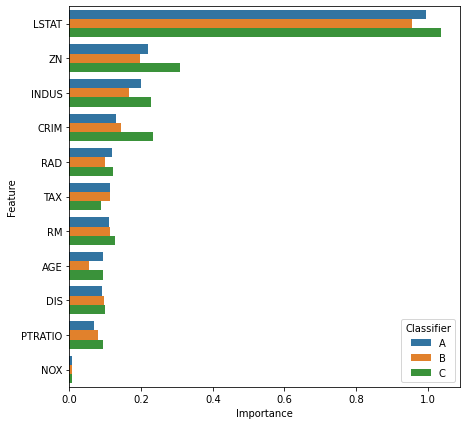

In [86]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(orient='h', data=feature_importances.reset_index(), y='Feature', x='Importance', hue='Classifier', ax=ax)
plt.savefig('figures/boston-featimp.pdf', bbox_inches='tight')